In [19]:
# Importiere die benötigten Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Datensatz laden
data = pd.read_csv('data/merged.csv')

# Übersicht des Datensatzes anzeigen
print("Erste Zeilen des Datensatzes:")
data.head()

Erste Zeilen des Datensatzes:


,recorded_at,station_id,forecast_time,parameter,value
0,2024-05-12 15:00:17.390012,10513,2024-05-12 15:00:00,precipitation_height_significant_weather_last_1h,0.0
1,2024-05-12 15:00:17.390012,10513,2024-05-12 16:00:00,precipitation_height_significant_weather_last_1h,0.0
2,2024-05-12 15:00:17.390012,10513,2024-05-12 17:00:00,precipitation_height_significant_weather_last_1h,0.0
3,2024-05-12 15:00:17.390012,10513,2024-05-12 18:00:00,precipitation_height_significant_weather_last_1h,0.0
4,2024-05-12 15:00:17.390012,10513,2024-05-12 19:00:00,precipitation_height_significant_weather_last_1h,0.0


In [24]:
# Zeige nur die ersten 10 eindeutigen Werte an, falls es viele gibt
for column in data.columns:
    unique_values = data[column].unique()[:10]
    print(f"Eindeutige Werte in der Spalte '{column}' (erste 10):")
    print(unique_values)
    print("\n")


Eindeutige Werte in der Spalte 'recorded_at' (erste 10):
['2024-05-12 15:00:17.390012' '2024-05-12 16:00:18.829261'
 '2024-05-12 17:00:20.624028' '2024-05-12 18:00:19.207758'
 '2024-05-12 19:00:19.758175' '2024-05-12 20:00:20.576626'
 '2024-05-12 21:00:18.446930' '2024-05-11 15:02:31.830845'
 '2024-05-11 15:03:48.939629' '2024-05-11 16:00:14.348392']


Eindeutige Werte in der Spalte 'station_id' (erste 10):
[10513 10776 10803 10554 10555 10865 10384 10714 10727 10729]


Eindeutige Werte in der Spalte 'forecast_time' (erste 10):
['2024-05-12 15:00:00' '2024-05-12 16:00:00' '2024-05-12 17:00:00'
 '2024-05-12 18:00:00' '2024-05-12 19:00:00' '2024-05-12 20:00:00'
 '2024-05-12 21:00:00' '2024-05-12 22:00:00' '2024-05-12 23:00:00'
 '2024-05-13 00:00:00']


Eindeutige Werte in der Spalte 'parameter' (erste 10):
['precipitation_height_significant_weather_last_1h'
 'temperature_air_mean_200']


Eindeutige Werte in der Spalte 'value' (erste 10):
[  0.     3.     0.5    1.   288.25 288.75 289.25 

In [21]:

# Information über die Spalten und deren Datentypen
print("\nInformationen zum Datensatz:")
data.info()


Informationen zum Datensatz:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20879520 entries, 0 to 20879519
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   recorded_at    object 
 1   station_id     int64  
 2   forecast_time  object 
 3   parameter      object 
 4   value          float64
dtypes: float64(1), int64(1), object(3)
memory usage: 796.5+ MB


In [22]:



# Fehlende Werte pro Spalte anzeigen
print("\nAnzahl der fehlenden Werte pro Spalte:")
data.isnull().sum()


Anzahl der fehlenden Werte pro Spalte:


recorded_at      0
station_id       0
forecast_time    0
parameter        0
value            0
dtype: int64

In [13]:


# Beschreibende Statistik für numerische Spalten
print("\nBeschreibende Statistik für numerische Spalten:")
data.describe()



Beschreibende Statistik für numerische Spalten:


,station_id,value
count,2.087952e+07,2.087952e+07
mean,1.066200e+04,1.447306e+02
std,1.442558e+02,1.447149e+02
min,1.038400e+04,0.000000e+00
25%,1.055400e+04,0.000000e+00
50%,1.071400e+04,1.422750e+02
75%,1.077600e+04,2.894500e+02
max,1.086500e+04,3.077500e+02


<Figure size 1200x800 with 0 Axes>

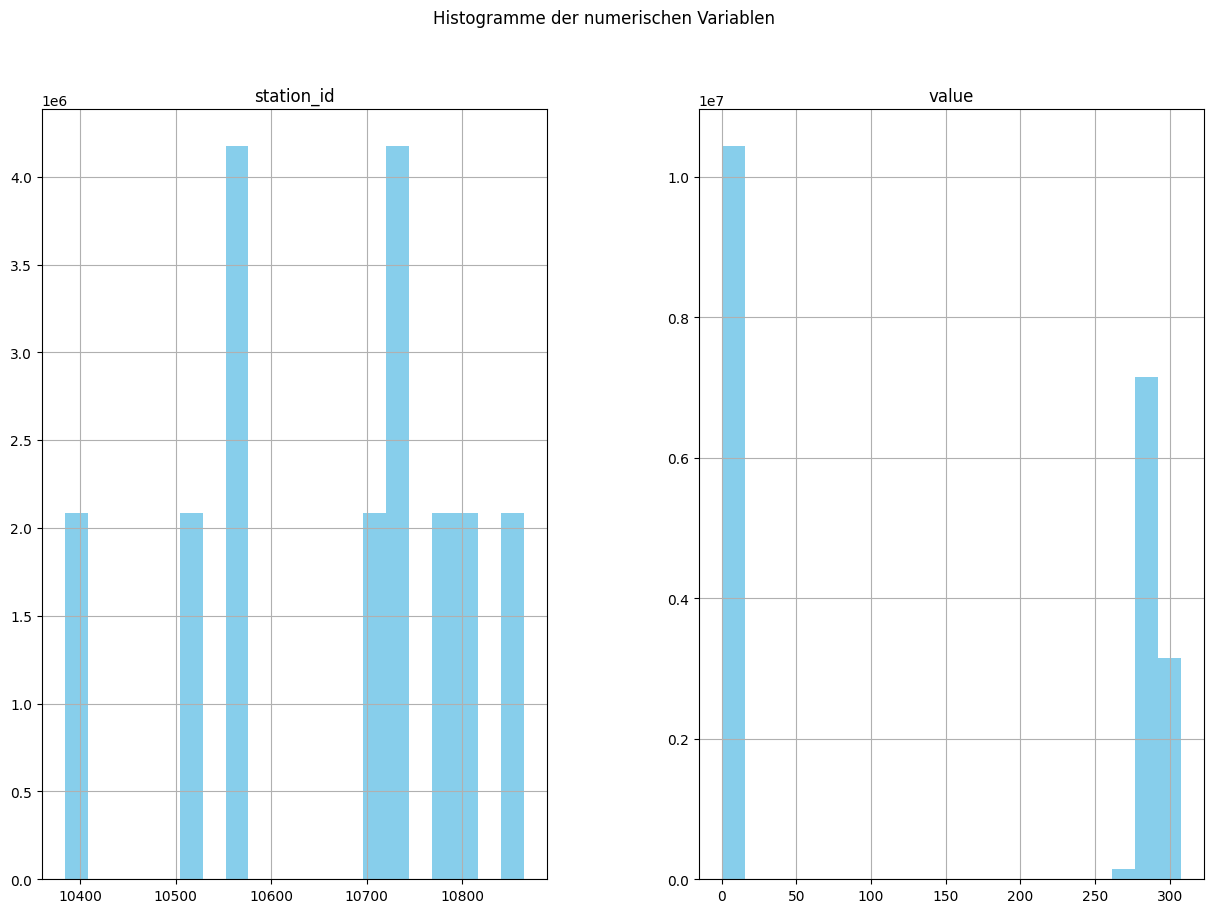

In [14]:

# Verteilung der Daten visualisieren
plt.figure(figsize=(12, 8))
data.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle('Histogramme der numerischen Variablen')
plt.show()

In [23]:
data.head()

,recorded_at,station_id,forecast_time,parameter,value
0,2024-05-12 15:00:17.390012,10513,2024-05-12 15:00:00,precipitation_height_significant_weather_last_1h,0.0
1,2024-05-12 15:00:17.390012,10513,2024-05-12 16:00:00,precipitation_height_significant_weather_last_1h,0.0
2,2024-05-12 15:00:17.390012,10513,2024-05-12 17:00:00,precipitation_height_significant_weather_last_1h,0.0
3,2024-05-12 15:00:17.390012,10513,2024-05-12 18:00:00,precipitation_height_significant_weather_last_1h,0.0
4,2024-05-12 15:00:17.390012,10513,2024-05-12 19:00:00,precipitation_height_significant_weather_last_1h,0.0


In [16]:

# Filtere die Parameter Temperatur und Niederschlag (Ändere Namen bei Bedarf)
parameter_to_analyze = ['temperature', 'precipitation']  # Beispielparameter, passe sie an
data = data[data['parameter'].isin(parameter_to_analyze)]

# Überprüfe die Daten für fehlende Werte
print("Fehlende Werte pro Spalte:")
print(data.isnull().sum())

# Zeitlich sortieren (falls nicht bereits sortiert)
data = data.sort_values(by='recorded_at')

Fehlende Werte pro Spalte:
recorded_at      0
station_id       0
forecast_time    0
parameter        0
value            0
dtype: int64


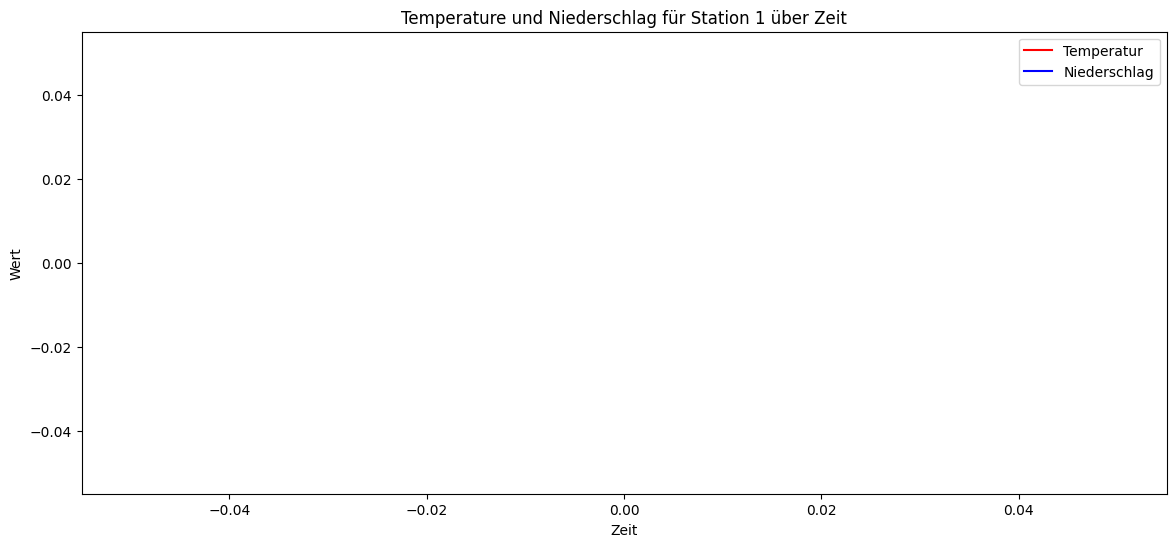

In [17]:
# Durchschnittstemperatur und -niederschlag pro Standort über die Zeit berechnen
grouped = data.groupby(['station_id', 'recorded_at', 'parameter']).mean().reset_index()

# Temperatur- und Niederschlagsverlauf für eine Station plotten
station_id = 1  # Beispielstation; anpassen für mehrere Stationen
temp_data = grouped[(grouped['station_id'] == station_id) & (grouped['parameter'] == 'temperature')]
precip_data = grouped[(grouped['station_id'] == station_id) & (grouped['parameter'] == 'precipitation')]

plt.figure(figsize=(14, 6))
plt.plot(temp_data['recorded_at'], temp_data['value'], label='Temperatur', color='red')
plt.plot(precip_data['recorded_at'], precip_data['value'], label='Niederschlag', color='blue')
plt.title(f'Temperature und Niederschlag für Station {station_id} über Zeit')
plt.xlabel('Zeit')
plt.ylabel('Wert')
plt.legend()
plt.show()


Korrelation zwischen Temperatur und Niederschlag:
parameter                                         precipitation_height_significant_weather_last_1h  \
parameter                                                                                            
precipitation_height_significant_weather_last_1h                                          1.000000   
temperature_air_mean_200                                                                  0.069062   

parameter                                         temperature_air_mean_200  
parameter                                                                   
precipitation_height_significant_weather_last_1h                  0.069062  
temperature_air_mean_200                                          1.000000  


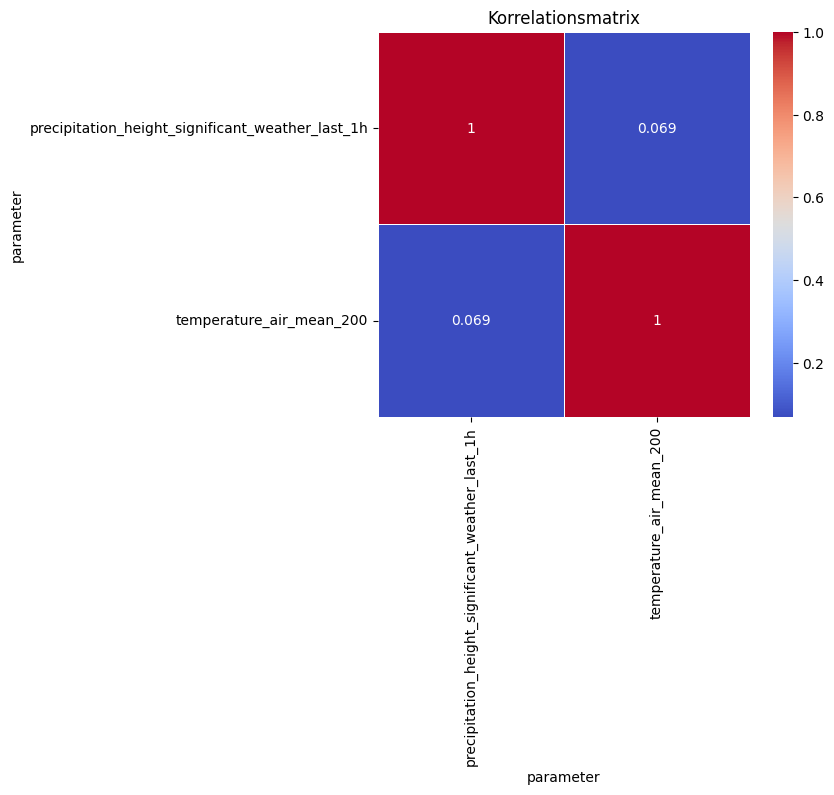

In [25]:
# Korrelation zwischen Temperatur und Niederschlag pro Standort berechnen
correlation_data = data.pivot_table(index='recorded_at', columns='parameter', values='value')
correlation = correlation_data.corr()
print("Korrelation zwischen Temperatur und Niederschlag:")
print(correlation)

# Visualisierung der Korrelation
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korrelationsmatrix')
plt.show()


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Beispiel: Vorhersage für Temperatur basierend auf station_id und forecast_time
temp_data = data[data['parameter'] == 'temperature'].copy()

# Feature-Engineering: Zeitspalten extrahieren
temp_data['hour'] = temp_data['recorded_at'].dt.hour
temp_data['day'] = temp_data['recorded_at'].dt.day
temp_data['month'] = temp_data['recorded_at'].dt.month
temp_data['year'] = temp_data['recorded_at'].dt.year

# Definiere Features und Zielvariable
X = temp_data[['station_id', 'hour', 'day', 'month', 'year']]
y = temp_data['value']

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell erstellen und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersage und Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE) der Temperaturvorhersage: {mse}')

# Vergleich von Vorhersage und tatsächlichen Werten plotten
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label='Tatsächliche Werte', color='blue')
plt.plot(y_pred[:50], label='Vorhergesagte Werte', color='orange')
plt.legend()
plt.title('Vergleich von Vorhersage und tatsächlichen Temperaturwerten')
plt.xlabel('Beispiele')
plt.ylabel('Temperatur')
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:


# Korrelationen zwischen numerischen Variablen analysieren
print("\nKorrelationsmatrix:")
data.corr()



Korrelationsmatrix:


ValueError: could not convert string to float: '2024-05-12 15:00:17.390012'

In [ ]:

# Heatmap der Korrelationen plotten
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korrelationsmatrix Heatmap")
plt.show()


In [ ]:

# Ausreißererkennung mit Boxplots
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column], color='skyblue')
    plt.title(f"Boxplot für {column}")
plt.tight_layout()
plt.show()
